<a href="https://colab.research.google.com/github/ayush1804027/Ayush/blob/master/tomato_pest_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

file_list = []
class_list = []

data_dir = '/content/drive/MyDrive/DEEP LEARNING/Tomato pest image enhancement'  # training dataset directry

categories = ['BA','HA','MP', 'SE','SL','TP','TU','ZC']          # four category for output


In [44]:
for category in categories:
  path = os.path.join(data_dir,category)
  print(path)
  print(os.listdir(path))

/content/drive/MyDrive/DEEP LEARNING/Tomato pest image enhancement/BA
['BA fliplr (17).jpg', 'BA180 (3).jpg', 'BA180 (37).JPG', 'BAimcrop (16).jpg', 'BAimcrop (56).JPG', 'BA fliplr (27).jpg', 'BA270 (7).jpg', 'BA fliplr (7).jpg', 'BAimcrop (29).jpg', 'BA fliplr (43).jpg', 'BA90 (55).JPG', 'BA180 (60).JPG', 'BA90 (19).jpg', 'BA fliplr (50).JPG', 'BA90 (45).jpg', 'BA fliplr (9).jpg', 'BAimcrop (17).jpg', 'BA180 (27).jpg', 'BA90 (44).jpg', 'BA (25).jpg', 'BA180 (4).JPG', 'BA (1).jpg', 'BA180 (55).JPG', 'BA270 (8).jpg', 'BA (56).JPG', 'BA180 (11).jpg', 'BA90 (33).jpg', 'BAimcrop (59).JPG', 'BAimcrop (6).jpg', 'BA90 (36).jpg', 'BA270 (38).jpg', 'BA fliplr (48).JPG', 'BA flipud (16).jpg', 'BA180 (33).jpg', 'BA90 (42).jpg', 'BA flipud (42).jpg', 'BA180 (43).jpg', 'BAimcrop (60).JPG', 'BA270 (23).jpg', 'BA90 (1).jpg', 'BA (37).JPG', 'BA180 (50).JPG', 'BA flipud (6).jpg', 'BA flipud (3).jpg', 'BA flipud (48).JPG', 'BA flipud (17).jpg', 'BA (13).jpg', 'BA90 (58).JPG', 'BA90 (38).jpg', 'BA flipud

In [45]:
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/DEEP LEARNING/Tomato pest image enhancement/BA/BA fliplr (17).jpg' 
img = cv2.imread(image_path)
img = cv2.resize(img,(150,150))

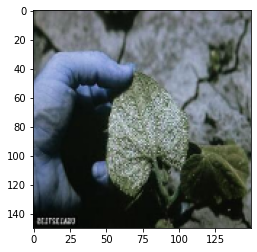

In [46]:
plt.imshow(img)

In [47]:
size=50
training_data = []
def create_data():
  for category in categories:
    path = os.path.join(data_dir,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(size,size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass



In [48]:
create_data()
len(training_data)

4263

In [49]:
random.shuffle(training_data)  # SUFFLE THE TRAINING DATASET

X = []         # feature
y = []         # labels

for feature, label in training_data:
  X.append(feature)
  y.append(label)

In [50]:
X = np.array(X).reshape(-1,size,size,3) #RESIZE THE TRAINING DATASET

In [51]:
import pickle
pickle_out = open('X_pest.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()


pickle_out = open('y_label.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

y = np.array(y)            # resizing the output dataset
y.dtype

dtype('int64')

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open('/content/X_pest.pickle','rb'))
y = pickle.load(open('/content/y_label.pickle','rb'))
X = X/255.0
# building the model
model = Sequential()


# 3 convolution layers
model.add(Conv2D(32,(3,3),input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hiden layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',
              metrics=['accuracy'])


In [ ]:
#from tensorflow.keras.utils import to_categorical
#y=to_categorical(y,num_classes=8)


In [61]:
X.shape
print(type(X))
y=np.array(y)
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [62]:
history = model.fit(X,y,batch_size=128, epochs=50, validation_split=0.01)

Epoch 1/50
33/33 [==============================] - 15s 417ms/step - loss: 2.0101 - accuracy: 0.2011 - val_loss: 1.9133 - val_accuracy: 0.2791
Epoch 2/50
33/33 [==============================] - 14s 412ms/step - loss: 1.8102 - accuracy: 0.3176 - val_loss: 1.7082 - val_accuracy: 0.3721
Epoch 3/50
33/33 [==============================] - 14s 412ms/step - loss: 1.6185 - accuracy: 0.3920 - val_loss: 1.6286 - val_accuracy: 0.4651
Epoch 4/50
33/33 [==============================] - 14s 412ms/step - loss: 1.4624 - accuracy: 0.4731 - val_loss: 1.5448 - val_accuracy: 0.4884
Epoch 5/50
33/33 [==============================] - 14s 412ms/step - loss: 1.3764 - accuracy: 0.5010 - val_loss: 1.5282 - val_accuracy: 0.3953
Epoch 6/50
33/33 [==============================] - 14s 419ms/step - loss: 1.2983 - accuracy: 0.5231 - val_loss: 1.2421 - val_accuracy: 0.4884
Epoch 7/50
33/33 [==============================] - 14s 414ms/step - loss: 1.2088 - accuracy: 0.5612 - val_loss: 1.2063 - val_accuracy: 0.5116

In [63]:
model.save_weights('plantDisease_model.h5')
model.save('plantCNN.model')

INFO:tensorflow:Assets written to: plantCNN.model/assets


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


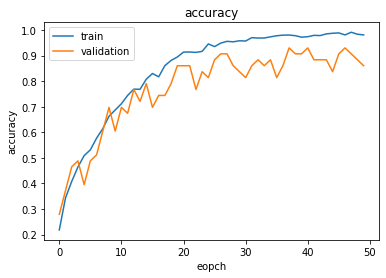

In [64]:
print(history.history.keys())
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('eopch')
plt.legend(['train','validation'],loc='upper left')

In [65]:
import cv2

In [66]:
def prepare(file):
  size = 50
  img_array = cv2.imread(file)
  new_array = cv2.resize(img_array,(size,size))
  return new_array.reshape(-1,size,size,3)

# model = tf.keras.models.load_model('CNN.model')
file1 = '/content/drive/MyDrive/DEEP LEARNING/Original image of tomato pest/BA/BA (1).jpg'
data = prepare(file1)
prediction = model.predict(data)
prediction = list(prediction[0])
print(categories[prediction.index(max(prediction))])

BA


In [67]:
prediction

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]